In [56]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
pd.set_option('precision',4)
from args_tools_jupyter import args, createfolder

In [57]:
print(args.keys())

dict_keys(['study_area', 'working_folder', 'ty_list', 'sta_list', 'TW_map_file', 'fortran_code_folder', 'radar_folder', 'radar_raw_data_folder', 'radar_compressed_data_folder', 'radar_wrangled_data_folder', 'radar_figures_folder', 'weather_folder', 'weather_raw_data_folder', 'weather_wrangled_data_folder', 'ty_info_folder', 'ty_info_raw_data_folder', 'ty_info_wrangled_data_folder', 'res_degree', 'compression', 'figure_dpi', 'RAD_level', 'QPE_level', 'QPF_level', 'PP01_level', 'PS01_level', 'WD01_level', 'WD02_level', 'RH01_level', 'TX01_level', 'RAD_cmap', 'QPE_cmap', 'QPF_cmap', 'PP01_cmap', 'PS01_cmap', 'WD01_cmap', 'WD02_cmap', 'RH01_cmap', 'TX01_cmap', 'weather_names', 'I_x', 'I_y', 'F_x', 'F_y', 'O_y', 'O_x', 'I_shape', 'F_shape', 'O_shape', 'I_x_iloc', 'I_y_iloc', 'F_x_iloc', 'F_y_iloc', 'I_x_list', 'I_y_list', 'F_x_list', 'F_y_list', 'O_x_list', 'O_y_list'])


In [4]:
# import geopandas as gpd
# shapefile = gpd.read_file(args.TW_map_file+'.shp')['geometry']
# shapefile

# import shapefile
# shape = shapefile.Reader(args.TW_map_file)
# #first feature of the shapefile
# writer = pd.ExcelWriter('test.xlsx', engine='xlsxwriter')
# all_points = pd.DataFrame([],columns=pd.Index(['lon','lat']))
# fig = plt.figure(dpi=args.figure_dpi)
# ax = plt.gca()
# for record, shape in zip(shape.records(), shape.shapes()):
#     points = pd.DataFrame(shape.points, columns=pd.Index(['lon','lat']), 
#                           index=pd.Index(np.arange(len(shape.points)), name=record[8]))
#     points.to_excel(writer, sheet_name=record[8])
#     all_points = pd.concat([all_points, points], axis=0)
#     ax.plot(points.lon, points.lat, 'k.', markersize=0.1)
#     ax.axis('scaled')
# writer.save()

## Taiwan

In [15]:
m = Basemap(projection='cyl', resolution='h', llcrnrlat=args.O_y[0], urcrnrlat=args.O_y[1], 
            llcrnrlon=args.O_x[0], urcrnrlon=args.O_x[1])

figures_folder = os.path.join(args.radar_figures_folder, 'Taiwan')

X, Y = np.meshgrid(np.linspace(args.O_x[0],args.O_x[1],args.O_shape[0]), 
                   np.linspace(args.O_y[0],args.O_y[1],args.O_shape[1]))

fig = plt.figure(dpi=args.figure_dpi)
createfolder(os.path.join(figures_folder))
for i in sorted(os.listdir(args.wrangled_radar_folder)):
    createfolder(os.path.join(figures_folder, i))
    for idx, j in enumerate(sorted(os.listdir(os.path.join(args.wrangled_radar_folder, i)))):
        ax = plt.gca()
        data = pd.read_pickle(os.path.join(args.wrangled_radar_folder, i, j), compression=args.compression)
        _ = m.readshapefile(args.TW_map_file, name='Taiwan', linewidth=0.25, drawbounds=True, color='k', ax=ax)
        cs = m.contourf(x=X, y=Y, data=data.values, colors=args[i+'_cmap'], levels=args[i+'_level'], ax=ax)
        ax.set_xlabel(r'longtitude($^o$)',fontdict={'fontsize':7})
        ax.set_ylabel(r'latitude($^o$)',fontdict={'fontsize':7})
        _ = ax.set_xticks(ticks = np.linspace(args.O_x[0], args.O_x[1], 5))
        _ = ax.set_yticks(ticks = np.linspace(args.O_y[0], args.O_y[1], 5))
        ax.tick_params('both', labelsize=7)
        cbar = fig.colorbar(cs)
        cbar.ax.tick_params(labelsize=7)
        fig.savefig(os.path.join(figures_folder, i, j[:-4]+'.png'), dpi=150, bbox_inches='tight')
        # 清除 axes 重新宣告 axes畫圖
        ax.cla()
        # 清空 fig畫布
        fig.clf()
        if idx % 1000 == 0:
            print(i, idx+1, j)

QPE 1 2012.SAOLA.201207312100.pkl
QPE 1001 2013.SOULIK.201307130110.pkl
QPE 2001 2015.CHAN-HOM.201507101110.pkl
QPE 3001 2016.MALAKAS.201609171820.pkl
QPF 1 2012.SAOLA.201207312100.pkl
QPF 1001 2013.SOULIK.201307131120.pkl
QPF 2001 2015.CHAN-HOM.201507102210.pkl
RAD 1 2012.SAOLA.201207312100.pkl
RAD 1001 2013.SOULIK.201307130110.pkl
RAD 2001 2015.CHAN-HOM.201507101110.pkl
RAD 3001 2016.MALAKAS.201609171820.pkl


<Figure size 900x600 with 0 Axes>

## Taipei

In [4]:
m= Basemap(projection='cyl', resolution='h', llcrnrlat=args.I_y[0], 
           urcrnrlat=args.I_y[1], llcrnrlon=args.I_x[0], urcrnrlon=args.I_x[1])

figures_folder = os.path.join(args.radar_figures_folder, 'Taipei')

X, Y = np.meshgrid(np.linspace(args.O_x[0],args.O_x[1],args.O_shape[0]), 
                   np.linspace(args.O_y[0],args.O_y[1],args.O_shape[1]))

fig = plt.figure(dpi=args.figure_dpi)

for i in sorted(os.listdir(args.wrangled_radar_folder)):
    createfolder(os.path.join(figures_folder, i))
    for idx, j in enumerate(sorted(os.listdir(os.path.join(args.wrangled_radar_folder, i)))):
        ax = plt.gca()
        data = pd.read_pickle(os.path.join(args.wrangled_radar_folder, i, j), compression=args.compression)
        _ = m.readshapefile(args.TW_map_file, name='Taiwan', linewidth=0.25, drawbounds=True, color='k', ax=ax)
        cs = m.contourf(x=X, y=Y, data=data, colors=args[i+'_cmap'], levels=args[i+'_level'], ax=ax)
        ax.set_xlabel(r'longtitude($^o$)',fontdict={'fontsize':7})
        ax.set_ylabel(r'latitude($^o$)',fontdict={'fontsize':7})
        _ = ax.set_xticks(ticks = np.linspace(args.I_x[0], args.I_x[1], 5))
        _ = ax.set_yticks(ticks = np.linspace(args.I_y[0], args.I_y[1], 5))
        ax.tick_params('both', labelsize=7)
        cbar = fig.colorbar(cs)
        cbar.ax.tick_params(labelsize=7)
        fig.savefig(os.path.join(figures_folder, i, j[:-4]+'.png'), dpi=150, bbox_inches='tight')
        if idx % 1000 == 0:
            print(i, idx+1, j[:-4]+'.png')
        # 清除 axes 重新宣告 axes畫圖
        ax.cla()
        # 清空 fig畫布
        fig.clf()

QPE 1 2012.SAOLA.201207312100.png
QPE 1001 2013.SOULIK.201307130110.png
QPE 2001 2015.CHAN-HOM.201507101110.png
QPE 3001 2016.MALAKAS.201609171820.png
QPF 1 2012.SAOLA.201207312100.png
QPF 1001 2013.SOULIK.201307131120.png
QPF 2001 2015.CHAN-HOM.201507102210.png
RAD 1 2012.SAOLA.201207312100.png
RAD 1001 2013.SOULIK.201307130110.png
RAD 2001 2015.CHAN-HOM.201507101110.png
RAD 3001 2016.MALAKAS.201609171820.png


<Figure size 900x600 with 0 Axes>

### Plot all data together in TW

In [3]:
m = Basemap(projection='cyl', resolution='h', llcrnrlat=args.O_y[0], urcrnrlat=args.O_y[1], 
            llcrnrlon=args.O_x[0], urcrnrlon=args.O_x[1])

## original

KeyError: '201807111310'

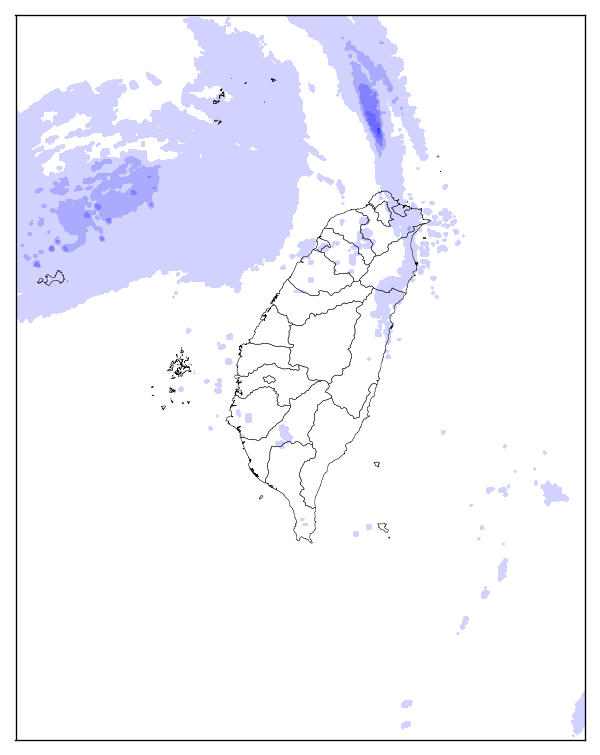

In [81]:
figures_folder = os.path.join(args.radar_figures_folder, 'Taiwan', 'RAD_and_QPE_dpi'+str(args.figure_dpi), 'Original')
createfolder(os.path.join(figures_folder))

X, Y = np.meshgrid(np.linspace(args.O_x[0],args.O_x[1],args.O_shape[0]), 
                   np.linspace(args.O_y[0],args.O_y[1],args.O_shape[1]))

data_type = ['QPE','RAD']
file_list = sorted(os.listdir(os.path.join(args.radar_wrangled_data_folder, data_type[1])))

fig = plt.figure(figsize=(len(data_type)*8,8), dpi=args.figure_dpi)

for i in range(len(file_list)):
    filename = file_list[i]
    trackname = file_list[i][:-17]
    tracktime = file_list[i][-16:-4]
    ty_track = pd.read_csv(os.path.join(args.ty_info_wrangled_data_folder, trackname+'.csv'))
    ty_track.Time = pd.to_datetime(ty_track.Time)
    ty_track.set_index('Time', inplace=True)
    ty_track = ty_track.reindex(columns=['Lat','Lon'])
    
    for idx in range(len(data_type)):
        ax = fig.add_subplot(1, len(data_type), idx+1)
        data = pd.read_pickle(os.path.join(args.radar_wrangled_data_folder, data_type[idx], filename), compression=args.compression)
        _ = m.readshapefile(args.TW_map_file, name='Taiwan', linewidth=0.25, drawbounds=True, color='k', ax=ax)
        cs = m.contourf(x=X, y=Y, data=data.to_numpy(), colors=args[data_type[idx]+'_cmap'], levels=args[data_type[idx]+'_level'], ax=ax)
        ax.scatter(x=ty_track.loc[tracktime].Lon, y=ty_track.loc[tracktime].Lat, marker='h', color='g', label='Ty Center')
        ax.plot(ty_track.Lon, ty_track.Lat, '--', color='gray', label='Ty Path')
        ax.set_xlabel(r'longtitude($^o$)',fontdict={'fontsize':10})
        ax.set_ylabel(r'latitude($^o$)',fontdict={'fontsize':10})
        _ = ax.set_xticks(ticks = np.linspace(args.O_x[0], args.O_x[1], 5))
        _ = ax.set_yticks(ticks = np.linspace(args.O_y[0], args.O_y[1], 5))
        ax.tick_params('both', labelsize=10)
        cbar = fig.colorbar(cs, ax=ax, shrink=0.8)
        cbar.ax.tick_params(labelsize=10)
        ax.legend(fontsize=10)
        ax.set_title(data_type[idx],fontsize=10)
        fig.suptitle(filename[:-4])
    fig.savefig(os.path.join(figures_folder, filename[:-4]+'.png'), dpi=args.figure_dpi, bbox_inches='tight')
    fig.clf()

## QPE with winds

In [79]:
figures_folder = os.path.join(args.radar_figures_folder, 'Taiwan', 'RAD_and_QPE_dpi'+str(args.figure_dpi), 'WD')
createfolder(os.path.join(figures_folder))

X, Y = np.meshgrid(np.linspace(args.O_x[0],args.O_x[1],args.O_shape[0]), 
                   np.linspace(args.O_y[0],args.O_y[1],args.O_shape[1]))

data_type = ['QPE']
file_list = sorted(os.listdir(os.path.join(args.radar_wrangled_data_folder, data_type[0])))

fig = plt.figure(figsize=(len(data_type)*8,8), dpi=args.figure_dpi)

for i in range(len(file_list)):
    filename = file_list[i]
    trackname = file_list[i][:-17]
    tracktime = file_list[i][-16:-4]
    ty_track = pd.read_csv(os.path.join(args.ty_info_wrangled_data_folder, trackname+'.csv'))
    ty_track.Time = pd.to_datetime(ty_track.Time)
    ty_track.set_index('Time', inplace=True)
    ty_track = ty_track.reindex(columns=['Lat','Lon'])
    wx = np.arange(0,561,20)
    wy = np.arange(0,441,20)
    wd01 = pd.read_pickle(os.path.join(args.weather_wrangled_data_folder, 'WD01', filename), compression=args.compression).iloc[wx,wy]
    wd02 = pd.read_pickle(os.path.join(args.weather_wrangled_data_folder, 'WD02', filename), compression=args.compression).iloc[wx,wy].to_numpy()
    u = (np.sin(wd02)*wd01).to_numpy()
    v = (np.cos(wd02)*wd01).to_numpy()
    wx, wy = np.meshgrid(wd01.columns.to_numpy(), wd01.index.to_numpy())
    for idx in range(len(data_type)):
        ax = fig.add_subplot(1, len(data_type), idx+1)
        data = pd.read_pickle(os.path.join(args.radar_wrangled_data_folder, data_type[idx], filename), compression=args.compression)
        
        _ = m.readshapefile(args.TW_map_file, name='Taiwan', linewidth=0.25, drawbounds=True, color='k', ax=ax)
        cs = m.contourf(x=X, y=Y, data=data.to_numpy(), colors=args[data_type[idx]+'_cmap'], levels=args[data_type[idx]+'_level'], ax=ax)
        ax.quiver(wx,wy,u,v,color='gray')
        ax.scatter(x=ty_track.loc[tracktime].Lon, y=ty_track.loc[tracktime].Lat, marker='h', color='g', label='Ty Center')
        ax.plot(ty_track.Lon, ty_track.Lat, '--', color='gray', label='Ty Path')
        ax.set_xlabel(r'longtitude($^o$)',fontdict={'fontsize':10})
        ax.set_ylabel(r'latitude($^o$)',fontdict={'fontsize':10})
        _ = ax.set_xticks(ticks = np.linspace(args.O_x[0], args.O_x[1], 5))
        _ = ax.set_yticks(ticks = np.linspace(args.O_y[0], args.O_y[1], 5))
        ax.tick_params('both', labelsize=10)
        cbar = fig.colorbar(cs, ax=ax, shrink=0.8)
        cbar.ax.tick_params(labelsize=10)
        ax.legend(fontsize=10)
        ax.set_title(data_type[idx],fontsize=10)
        fig.suptitle(filename[:-4])
    fig.savefig(os.path.join(figures_folder, filename[:-4]+'.png'), dpi=args.figure_dpi, bbox_inches='tight')
    fig.clf()
    if file_list[i][:4] != '2012':
        break

<Figure size 960x960 with 0 Axes>

## QPE with rh

In [75]:
figures_folder = os.path.join(args.radar_figures_folder, 'Taiwan', 'RAD_and_QPE_dpi'+str(args.figure_dpi), 'RH')
createfolder(os.path.join(figures_folder))

X, Y = np.meshgrid(np.linspace(args.O_x[0],args.O_x[1],args.O_shape[0]), np.linspace(args.O_y[0],args.O_y[1],args.O_shape[1]))

data_type = ['QPE']
file_list = sorted(os.listdir(os.path.join(args.radar_wrangled_data_folder, data_type[0])))

fig = plt.figure(figsize=(len(data_type)*10,8), dpi=args.figure_dpi)

for i in range(len(file_list)):
    filename = file_list[i]
    trackname = file_list[i][:-17]
    tracktime = file_list[i][-16:-4]
    ty_track = pd.read_csv(os.path.join(args.ty_info_wrangled_data_folder, trackname+'.csv'))
    ty_track.Time = pd.to_datetime(ty_track.Time)
    ty_track.set_index('Time', inplace=True)
    ty_track = ty_track.reindex(columns=['Lat','Lon'])
    
    rh = pd.read_pickle(os.path.join(args.weather_wrangled_data_folder, 'RH01', filename), compression=args.compression)
    for idx in range(len(data_type)):
        ax = fig.add_subplot(1, len(data_type), idx+1)
        data = pd.read_pickle(os.path.join(args.radar_wrangled_data_folder, data_type[idx], filename), compression=args.compression)
        
        _ = m.readshapefile(args.TW_map_file, name='Taiwan', linewidth=0.25, drawbounds=True, color='k', ax=ax)
        
        cs = m.contourf(x=X, y=Y, data=rh.to_numpy(), alpha=0.8, cmap="RdBu_r", levels=args.RH01_level)
        cbar = fig.colorbar(cs, ax=ax, shrink=0.8, )
        cbar.ax.tick_params(labelsize=10)
        
        cs = m.contourf(x=X, y=Y, data=data.to_numpy(), alpha=0.8, colors=args[data_type[idx]+'_cmap'], levels=args[data_type[idx]+'_level'], ax=ax)
        cbar = fig.colorbar(cs, ax=ax, shrink=0.7)
        cbar.ax.tick_params(labelsize=10)
        
        ax.scatter(x=ty_track.loc[tracktime].Lon, y=ty_track.loc[tracktime].Lat, marker='h', color='g', label='Ty Center')
        ax.plot(ty_track.Lon, ty_track.Lat, '--', color='gray', label='Ty Path')
        ax.set_xlabel(r'longtitude($^o$)',fontdict={'fontsize':10})
        ax.set_ylabel(r'latitude($^o$)',fontdict={'fontsize':10})
        _ = ax.set_xticks(ticks = np.linspace(args.O_x[0], args.O_x[1], 5))
        _ = ax.set_yticks(ticks = np.linspace(args.O_y[0], args.O_y[1], 5))
        ax.tick_params('both', labelsize=10)
        ax.legend(fontsize=10)
        ax.set_title(data_type[idx], fontsize=10)
        fig.suptitle(filename[:-4])
    fig.savefig(os.path.join(figures_folder, filename[:-4]+'.png'), dpi=args.figure_dpi, bbox_inches='tight')
    fig.clf()
    if file_list[i][:4] != '2012':
        break

## QPE with PP

In [77]:
figures_folder = os.path.join(args.radar_figures_folder, 'Taiwan', 'RAD_and_QPE_dpi'+str(args.figure_dpi), 'PP')
createfolder(os.path.join(figures_folder))

X, Y = np.meshgrid(np.linspace(args.O_x[0],args.O_x[1],args.O_shape[0]), np.linspace(args.O_y[0],args.O_y[1],args.O_shape[1]))

data_type = ['QPE']
file_list = sorted(os.listdir(os.path.join(args.radar_wrangled_data_folder, data_type[0])))

fig = plt.figure(figsize=(len(data_type)*10,8), dpi=args.figure_dpi)

for i in range(len(file_list)):
    filename = file_list[i]
    trackname = file_list[i][:-17]
    tracktime = file_list[i][-16:-4]
    ty_track = pd.read_csv(os.path.join(args.ty_info_wrangled_data_folder, trackname+'.csv'))
    ty_track.Time = pd.to_datetime(ty_track.Time)
    ty_track.set_index('Time', inplace=True)
    ty_track = ty_track.reindex(columns=['Lat','Lon'])
    
    weatherdata = pd.read_pickle(os.path.join(args.weather_wrangled_data_folder, 'PP01', filename), compression=args.compression)
    for idx in range(len(data_type)):
        ax = fig.add_subplot(1, len(data_type), idx+1)
        data = pd.read_pickle(os.path.join(args.radar_wrangled_data_folder, data_type[idx], filename), compression=args.compression)
        
        _ = m.readshapefile(args.TW_map_file, name='Taiwan', linewidth=0.25, drawbounds=True, color='k', ax=ax)
        
        cs = m.contourf(x=X, y=Y, data=weatherdata.to_numpy(), alpha=0.8, cmap="RdBu_r", levels=args.PP01_level)
        cbar = fig.colorbar(cs, ax=ax, shrink=0.8, )
        cbar.ax.tick_params(labelsize=10)
        
        cs = m.contourf(x=X, y=Y, data=data.to_numpy(), alpha=0.8, colors=args[data_type[idx]+'_cmap'], levels=args[data_type[idx]+'_level'], ax=ax)
        cbar = fig.colorbar(cs, ax=ax, shrink=0.8)
        cbar.ax.tick_params(labelsize=10)
        
        ax.scatter(x=ty_track.loc[tracktime].Lon, y=ty_track.loc[tracktime].Lat, marker='h', color='g', label='Ty Center')
        ax.plot(ty_track.Lon, ty_track.Lat, '--', color='gray', label='Ty Path')
        ax.set_xlabel(r'longtitude($^o$)',fontdict={'fontsize':10})
        ax.set_ylabel(r'latitude($^o$)',fontdict={'fontsize':10})
        _ = ax.set_xticks(ticks = np.linspace(args.O_x[0], args.O_x[1], 5))
        _ = ax.set_yticks(ticks = np.linspace(args.O_y[0], args.O_y[1], 5))
        ax.tick_params('both', labelsize=10)
        ax.legend(fontsize=10)
        ax.set_title(data_type[idx], fontsize=10)
        fig.suptitle(filename[:-4])
    fig.savefig(os.path.join(figures_folder, filename[:-4]+'.png'), dpi=args.figure_dpi, bbox_inches='tight')
    fig.clf()
    if file_list[i][:4] != '2012':
        break

## QPE with PS

In [80]:
figures_folder = os.path.join(args.radar_figures_folder, 'Taiwan', 'RAD_and_QPE_dpi'+str(args.figure_dpi), 'PS')
createfolder(os.path.join(figures_folder))

X, Y = np.meshgrid(np.linspace(args.O_x[0],args.O_x[1],args.O_shape[0]), np.linspace(args.O_y[0],args.O_y[1],args.O_shape[1]))

data_type = ['QPE']
file_list = sorted(os.listdir(os.path.join(args.radar_wrangled_data_folder, data_type[0])))

fig = plt.figure(figsize=(len(data_type)*10,8), dpi=args.figure_dpi)

for i in range(len(file_list)):
    filename = file_list[i]
    trackname = file_list[i][:-17]
    tracktime = file_list[i][-16:-4]
    ty_track = pd.read_csv(os.path.join(args.ty_info_wrangled_data_folder, trackname+'.csv'))
    ty_track.Time = pd.to_datetime(ty_track.Time)
    ty_track.set_index('Time', inplace=True)
    ty_track = ty_track.reindex(columns=['Lat','Lon'])
    
    weatherdata = pd.read_pickle(os.path.join(args.weather_wrangled_data_folder, 'PS01', filename), compression=args.compression)
    for idx in range(len(data_type)):
        ax = fig.add_subplot(1, len(data_type), idx+1)
        data = pd.read_pickle(os.path.join(args.radar_wrangled_data_folder, data_type[idx], filename), compression=args.compression)
        
        _ = m.readshapefile(args.TW_map_file, name='Taiwan', linewidth=0.25, drawbounds=True, color='k', ax=ax)
        
        cs = m.contourf(x=X, y=Y, data=weatherdata.to_numpy(), alpha=0.8, cmap="RdBu_r", levels=args.PP01_level)
        cbar = fig.colorbar(cs, ax=ax, shrink=0.8, )
        cbar.ax.tick_params(labelsize=10)
        
        cs = m.contourf(x=X, y=Y, data=data.to_numpy(), alpha=0.8, colors=args[data_type[idx]+'_cmap'], levels=args[data_type[idx]+'_level'], ax=ax)
        cbar = fig.colorbar(cs, ax=ax, shrink=0.8)
        cbar.ax.tick_params(labelsize=10)
        
        ax.scatter(x=ty_track.loc[tracktime].Lon, y=ty_track.loc[tracktime].Lat, marker='h', color='g', label='Ty Center')
        ax.plot(ty_track.Lon, ty_track.Lat, '--', color='gray', label='Ty Path')
        ax.set_xlabel(r'longtitude($^o$)',fontdict={'fontsize':10})
        ax.set_ylabel(r'latitude($^o$)',fontdict={'fontsize':10})
        _ = ax.set_xticks(ticks = np.linspace(args.O_x[0], args.O_x[1], 5))
        _ = ax.set_yticks(ticks = np.linspace(args.O_y[0], args.O_y[1], 5))
        ax.tick_params('both', labelsize=10)
        ax.legend(fontsize=10)
        ax.set_title(data_type[idx], fontsize=10)
        fig.suptitle(filename[:-4])
    fig.savefig(os.path.join(figures_folder, filename[:-4]+'.png'), dpi=args.figure_dpi, bbox_inches='tight')
    fig.clf()
    if file_list[i][:4] != '2012':
        break

<Figure size 1200x960 with 0 Axes>

### Plot all data together in Taipei

In [24]:
m = Basemap(projection='cyl', resolution='h', llcrnrlat=args.I_y[0], 
           urcrnrlat=args.I_y[1], llcrnrlon=args.I_x[0], urcrnrlon=args.I_x[1])

In [27]:
figures_folder = os.path.join(args.radar_figures_folder, 'Taipei', 'RAD_and_QPE_dpi100')
createfolder(os.path.join(figures_folder))

X, Y = np.meshgrid(np.linspace(args.O_x[0],args.O_x[1],args.O_shape[0]), 
                   np.linspace(args.O_y[0],args.O_y[1],args.O_shape[1]))

data_type = ['QPE','RAD']
file_list = sorted(os.listdir(os.path.join(args.radar_wrangled_data_folder, data_type[1])))

fig = plt.figure(figsize=(len(data_type)*8,8), dpi=args.figure_dpi)

for filename in file_list:
    for idx in range(len(data_type)):
        ax = fig.add_subplot(1, len(data_type), idx+1)
        data = pd.read_pickle(os.path.join(args.radar_wrangled_data_folder, data_type[idx], filename), compression=args.compression)
        _ = m.readshapefile(args.TW_map_file, name='Taiwan', linewidth=0.25, drawbounds=True, color='k', ax=ax)
        cs = m.contourf(x=X, y=Y, data=data.to_numpy(), colors=args[data_type[idx]+'_cmap'], levels=args[data_type[idx]+'_level'], ax=ax)
        ax.set_xlabel(r'longtitude($^o$)',fontdict={'fontsize':10})
        ax.set_ylabel(r'latitude($^o$)',fontdict={'fontsize':10})
        _ = ax.set_xticks(ticks = np.linspace(args.I_x[0], args.I_x[1], 5))
        _ = ax.set_yticks(ticks = np.linspace(args.I_y[0], args.I_y[1], 5))
        ax.tick_params('both', labelsize=10)
        cbar = fig.colorbar(cs, ax=ax)
        cbar.ax.tick_params(labelsize=10)
        fig.suptitle(filename[:-4])
    fig.savefig(os.path.join(figures_folder, filename[:-4]+'.png'), dpi=100, bbox_inches='tight')
    fig.clf()

<Figure size 2400x1200 with 0 Axes>

'201207312100'

In [19]:
ty_track.loc['20120731210000']

Lat     21.666667
Lon    124.066667
Name: 2012-07-31 21:00:00, dtype: float64